In [1]:
import pandas as pd
import numpy as np
import sqlite3 as sq
from prettytable import PrettyTable 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
connection = sq.connect('streetsd')
conn = connection.cursor()

In [3]:
conn.execute("CREATE TABLE IF NOT EXISTS test_table" + 
            "(seg_id string,oci float,street string,\
              street_from string,street_to string,\
              seg_length_ft float,seg_width_ft float, \
              func_class string,pvm_class string, \
              area_sq_ft float, oci_desc string, \
              oci_wt float)")

In [4]:
table1 = pd.read_csv('oci_2015_datasd.csv')

In [5]:
table1.to_sql('test_table', connection, if_exists='replace', index=False)

In [6]:
pd.read_sql(f'SELECT * FROM test_table limit 5', connection)

,seg_id,oci,street,street_from,street_to,seg_length_ft,seg_width_ft,func_class,pvm_class,area_sq_ft,oci_desc,oci_wt
0,SA-000003,65.14,ALLEY,None,None,772.7258,30.0,Alley,PCC Jointed Concrete,23181.774,Fair,1.510061e+06
1,SA-000004,67.45,ALLEY,None,None,196.0025,30.0,Alley,PCC Jointed Concrete,5880.075,Fair,3.966111e+05
2,SA-000005,70.88,ALLEY,None,None,395.0049,30.0,Alley,PCC Jointed Concrete,11850.147,Good,8.399384e+05
3,SA-000006,84.00,ALLEY,None,None,192.0025,30.0,Alley,PCC Jointed Concrete,5760.075,Good,4.838463e+05
4,SA-000008,79.24,ALLEY,None,None,251.7540,30.0,Alley,PCC Jointed Concrete,7552.620,Good,5.984696e+05


In [7]:
conn.execute("CREATE TABLE IF NOT EXISTS test_table2" + 
            "(pve_id int,seg_id string,project_id string,\
              title string,project_manager string, \
              project_manager_phone string,status string,\
              type string,resident_engineer string, \
              address_street string,street_from string, \
              street_to string,seg_cd int,length int, \
              width int,date_moratorium date,date_start date,\
              date_end date,paving_miles float)")

In [8]:
table_2 = pd.read_csv("sd_paving_datasd.csv")

In [9]:
table_2.to_sql('test_table2', connection, if_exists='replace', index=False)

In [10]:
pd.read_sql(f'SELECT * FROM test_table2 limit 5', connection)

,pve_id,seg_id,project_id,title,project_manager,project_manager_phone,status,type,resident_engineer,address_street,street_from,street_to,seg_cd,length,width,date_moratorium,date_start,date_end,paving_miles
0,1073577074,SA-000319,UTLY,Public Works CIP,Engineering@sandiego.gov,858-627-3200,post construction,Overlay,ECP,ALLEY,None,None,2.0,0,NaN,2019-02-02,2019-02-02,2019-02-02,0.000000
1,1792486183,SA-000345,UTLY,Public Works CIP,Engineering@sandiego.gov,858-627-3200,post construction,Slurry,ECP,ALLEY,None,None,2.0,938,30.0,2019-01-30,2019-01-30,2019-01-30,0.177652
2,1173780646,SA-000375,UTLY,Public Works CIP,Engineering@sandiego.gov,858-627-3200,post construction,Slurry,ECP,ALLEY,None,None,2.0,674,30.0,2018-08-01,2018-08-01,2018-08-01,0.127652
3,1276790298,SA-000378,UTLY,Public Works CIP,Engineering@sandiego.gov,858-627-3200,post construction,Slurry,ECP,ALLEY,None,None,2.0,658,30.0,2018-08-01,2018-08-01,2018-08-01,0.124621
4,27170959,SA-001081,UTLY,Public Works CIP,Engineering@sandiego.gov,858-627-3200,post construction,Concrete,ECP,ALLEY,None,None,9.0,680,30.0,None,2020-08-13,2020-08-13,0.128788


In [11]:
conn.execute("CREATE TABLE IF NOT EXISTS test_table3" + 
            "(id string,street_name string,limits string,\
              northbound_count int,southbound_count int, \
              eastbound_count int,westbound_count int, \
              total_count int,file_no string,date_count date)")

In [12]:
table_3 = pd.read_csv("traffic_counts_datasd.csv")

In [13]:
table_3.to_sql('test_table3', connection, if_exists='replace', index=False)

In [14]:
pd.read_sql(f'SELECT * FROM test_table3 limit 5', connection)

,id,street_name,limits,northbound_count,southbound_count,eastbound_count,westbound_count,total_count,file_no,date_count
0,01AV018207,01 AV,A ST - ASH ST,18010,None,None,None,18010,0182-07,2007-03-13
1,01AV015210,01 AV,A ST - ASH ST,20060,None,None,None,20060,0152-10,2010-03-18
2,01AV018213,01 AV,A ST - ASH ST,19597,None,None,None,19597,0182-13,2013-03-12
3,01AV007721,01 AV,A ST - ASH ST,10640,None,None,None,10640,0077-21,2021-03-10
4,01AV088812,01 AV,ASH ST - BEECH ST,2298,None,None,None,2298,0888-12,2012-12-11


In [15]:
df = pd.read_sql(f'SELECT * FROM (SELECT * FROM test_table \
                   t1 INNER JOIN test_table2 t2 \
                   ON t1.seg_id = t2.seg_id) m1 LEFT JOIN (SELECT street_name, \
                                                           SUM(total_count) total_count \
                                                           FROM test_table3 \
                                                           GROUP BY street_name) t3 \
                   ON m1.address_street = t3.street_name', connection)

In [16]:
df.head(5)

,seg_id,oci,street,street_from,street_to,seg_length_ft,seg_width_ft,func_class,pvm_class,area_sq_ft,...,street_to:1,seg_cd,length,width,date_moratorium,date_start,date_end,paving_miles,street_name,total_count
0,SA-000345,34.14,ALLEY,None,None,937.9261,30.0,Alley,AC Improved,28137.783,...,None,2.0,938,30.0,2019-01-30,2019-01-30,2019-01-30,0.177652,None,NaN
1,SA-000375,97.25,ALLEY,None,None,673.3209,30.0,Alley,PCC Jointed Concrete,20199.627,...,None,2.0,674,30.0,2018-08-01,2018-08-01,2018-08-01,0.127652,None,NaN
2,SA-000378,62.67,ALLEY,None,None,657.2000,30.0,Alley,PCC Jointed Concrete,19716.000,...,None,2.0,658,30.0,2018-08-01,2018-08-01,2018-08-01,0.124621,None,NaN
3,SA-001081,68.86,ALLEY,None,None,679.1060,30.0,Alley,PCC Jointed Concrete,20373.180,...,None,9.0,680,30.0,None,2020-08-13,2020-08-13,0.128788,None,NaN
4,SA-001083,28.67,ALLEY,None,None,660.0917,30.0,Alley,PCC Jointed Concrete,19802.751,...,None,9.0,661,30.0,None,2020-07-31,2020-07-31,0.125189,None,NaN


In [17]:
# drop unnecessary columns
df = df.drop(columns=['street_from', 'street_to'])
# df.to_csv('sd_roads_dataframe.csv')

### Exploratory Data Analysis (EDA)

In [18]:
# get number of rows and columns
print('Number of Rows:', df.shape[0])
print('Number of Columns:', df.shape[1], '\n')

# inspect datatypes and nulls
data_types = df.dtypes
data_types = pd.DataFrame(data_types)
data_types = data_types.assign(Null_Values = 
                               df.isnull().sum())
data_types.reset_index(inplace = True)
data_types.rename(columns={0:'Data Type',
                          'index': 'Column/Variable',
                          'Null_Values': "# of Nulls"})

Number of Rows: 23005
Number of Columns: 31 



,Column/Variable,Data Type,# of Nulls
0,seg_id,object,0
1,oci,float64,0
2,street,object,0
3,seg_length_ft,float64,0
4,seg_width_ft,float64,0
5,func_class,object,0
6,pvm_class,object,0
7,area_sq_ft,float64,0
8,oci_desc,object,0
9,oci_wt,float64,0


In [19]:
# remove duplicated columns
df = df.loc[:,~df.columns.duplicated()]

### Bias Exploration

To explore potential areas of bias, we will endeavor to trace class imbalance on the target feature of "oci_desc."

In [20]:
oci_desc_fair = df['oci_desc'].value_counts()['Fair']
oci_desc_good = df['oci_desc'].value_counts()['Good']
oci_desc_poor = df['oci_desc'].value_counts()['Poor']
oci_desc_total = oci_desc_fair  + oci_desc_good + oci_desc_poor

table1 = PrettyTable() # build a table
table1.field_names = ['Fair Condition', 'Good Condition', 
                      'Poor Condition', 'Total']
table1.add_row([oci_desc_fair, oci_desc_good, oci_desc_poor, 
                oci_desc_total])
table1

Fair Condition,Good Condition,Poor Condition,Total
6105,15758,1142,23005


In [21]:
perc_good = oci_desc_good /(oci_desc_total) 
perc_fair = oci_desc_fair /(oci_desc_total)
perc_poor = oci_desc_poor /(oci_desc_total)
print(round(perc_good, 2)*100, '% of streets '
                       'are in good condition ')
print(round(perc_fair, 2)*100, '% of streets '
                       'are in fair condition ')
print(round(perc_poor, 2)*100, '% of streets '
                       'are in poor condition ')

68.0 % of streets are in good condition 
27.0 % of streets are in fair condition 
5.0 % of streets are in poor condition 


Considerably more than half of the streets are in good condition. A little less than a third are in fair condition. Only 5% are in poor condition.

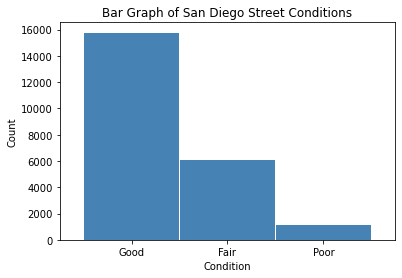

Good    15758
Fair     6105
Poor     1142
Name: oci_desc, dtype: int64

In [22]:
# accidents injury bar graph
conditions = df['oci_desc'].value_counts()
fig = plt.figure()
conditions.plot.bar(x ='lab', y='val', rot=0, width=0.99, 
                         color="steelblue")
plt.title ('Bar Graph of San Diego Street Conditions')
plt.xlabel('Condition') 
plt.ylabel('Count')
plt.show()

conditions

In [23]:
# cast oci info into range of values
labels = [ "{0} - {1}".format(i, i + 5) for i in range(0, 100, 10) ]
df['OCI Range'] = pd.cut(df.oci, range(0, 105, 10), 
                                right=False, 
                                labels=labels).astype(object)
# inspect the new dataframe with this info
df[['oci', 'OCI Range']]

,oci,OCI Range
0,34.14,30 - 35
1,97.25,90 - 95
2,62.67,60 - 65
3,68.86,60 - 65
4,28.67,20 - 25
...,...,...
23000,93.40,90 - 95
23001,91.01,90 - 95
23002,97.26,90 - 95
23003,95.00,90 - 95


In [24]:
print("\033[1m"+'Street Conditions by Condition Index Range'+"\033[1m")
def oci_cond():
    oci_desc_good = df.loc[df.oci_desc == 'Good'].groupby(
                               ['OCI Range'])[['oci_desc']].count()
    oci_desc_good.rename(columns = {'oci_desc':'Good'}, inplace=True)

    oci_desc_fair = df.loc[df.oci_desc == 'Fair'].groupby(
                               ['OCI Range'])[['oci_desc']].count()
    oci_desc_fair.rename(columns = {'oci_desc':'Fair'}, inplace=True)

    oci_desc_poor = df.loc[df.oci_desc == 'Poor'].groupby(
                               ['OCI Range'])[['oci_desc']].count()
    oci_desc_poor.rename(columns = {'oci_desc':'Poor'}, inplace=True)

    oci_desc_comb = pd.concat([oci_desc_good, oci_desc_fair, oci_desc_poor], 
    axis = 1)
    # sum row totals
    oci_desc_comb.loc['Total']= oci_desc_comb.sum(numeric_only=True, axis=0)
    # sum column totals
    oci_desc_comb.loc[:,'Total'] = oci_desc_comb.sum(numeric_only=True, axis=1)

    oci_desc_comb.fillna(0, inplace = True)
    return oci_desc_comb.style.format("{:,.0f}")

oci_cond = oci_cond().data # retrieve dataframe
oci_cond

Street Conditions by Condition Index Range


,Good,Fair,Poor,Total
70 - 75,4766.0,3.0,0.0,4769.0
80 - 85,7341.0,0.0,0.0,7341.0
90 - 95,3541.0,0.0,0.0,3541.0
40 - 45,0.0,1095.0,0.0,1095.0
50 - 55,0.0,1685.0,0.0,1685.0
60 - 65,0.0,3322.0,0.0,3322.0
0 - 5,0.0,0.0,37.0,37.0
10 - 15,0.0,0.0,135.0,135.0
20 - 25,0.0,0.0,259.0,259.0
30 - 35,0.0,0.0,711.0,711.0


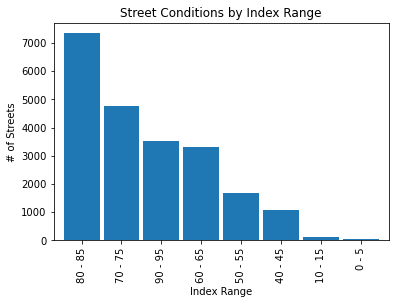

In [25]:
oci_plt = oci_cond['Total'][0:8].sort_values(ascending=False)
oci_plt.plot(kind='bar', width=0.90)
plt.title('Street Conditions by Index Range')
plt.xlabel('Index Range')
plt.ylabel('# of Streets')
plt.show()

### Summary Statistics 

In [26]:
# summary statistics
summ_stats = pd.DataFrame(df['oci'].describe()).T
summ_stats

,count,mean,std,min,25%,50%,75%,max
oci,23005.0,74.791413,16.784048,0.0,66.3,79.06,87.3,100.0


In [27]:
print("\033[1m"+'Overall Condition Index (OCI) Summary'+"\033[1m")
def oci_by_range():
    pd.options.display.float_format = '{:,.2f}'.format
    new = df.groupby('OCI Range')['oci']\
    .agg(["mean", "median", "std", "min", "max"])
    new.loc['Total'] = new.sum(numeric_only=True, axis=0)
    column_rename = {'mean': 'Mean', 'median': 'Median',
                     'std': 'Standard Deviation',\
                     'min':'Minimum','max': 'Maximum'}
    dfsummary = new.rename(columns = column_rename)
    return dfsummary
oci_by_range = oci_by_range()
oci_by_range

Overall Condition Index (OCI) Summary


,Mean,Median,Standard Deviation,Minimum,Maximum
OCI Range,,,,,
0 - 5,6.13,8.00,3.70,0.00,9.69
10 - 15,15.66,16.40,2.82,10.11,19.84
20 - 25,25.77,26.17,2.91,20.12,29.96
30 - 35,35.63,36.04,2.80,30.04,39.98
40 - 45,45.37,45.58,2.88,40.00,49.98
50 - 55,55.62,56.00,2.88,50.00,59.98
60 - 65,65.56,65.80,2.82,60.00,69.99
70 - 75,75.11,75.16,2.97,70.00,79.99
80 - 85,85.14,85.15,2.84,80.00,89.99


### Histogram Distributions

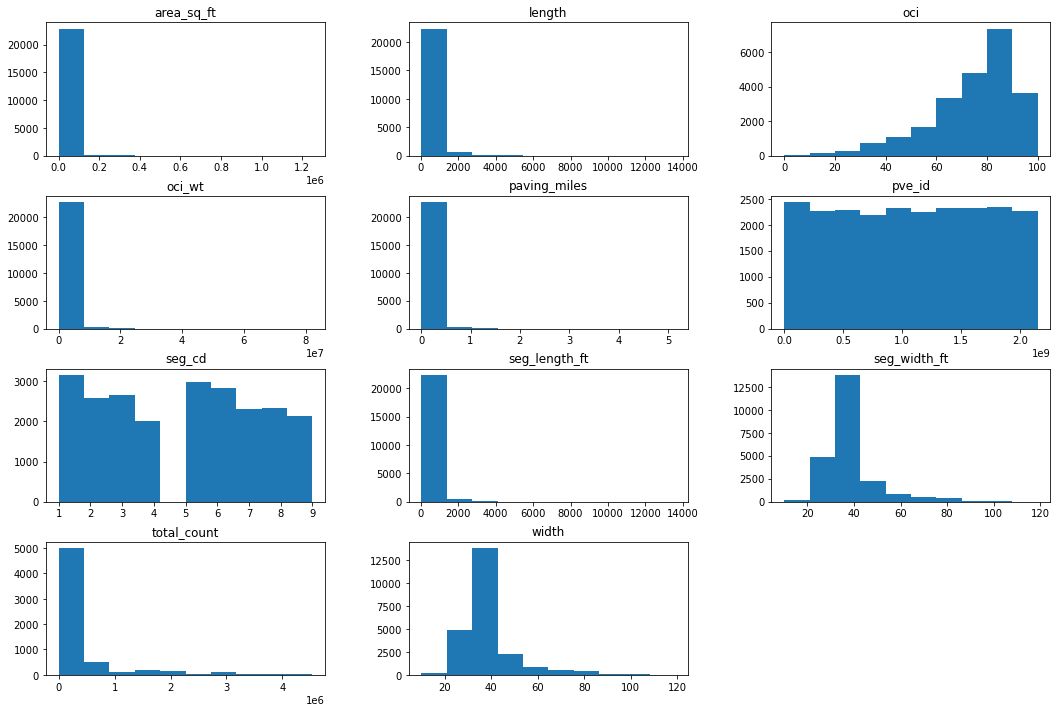

In [28]:
# histograms
df.hist(grid=False, figsize=(18,12))
plt.show()

### Boxplot Distribution

Boxplot Distribution


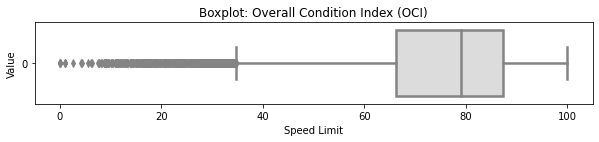

The first quartile is 66.3. 
The third quartile is 87.3. 
The IQR is 21.0.
The mean is 74.79. 
The standard deviation is 16.78. 
The median is 79.06. 


In [29]:
# selected boxplot distribution for oci values
print("\033[1m"+'Boxplot Distribution'+"\033[1m")

# Boxplot of age as one way of showing distribution
fig = plt.figure(figsize = (10,1.5))
plt.title ('Boxplot: Overall Condition Index (OCI)')
plt.xlabel('Speed Limit')
plt.ylabel('Value')
sns.boxplot(data=df['oci'], 
            palette="coolwarm", orient='h', 
            linewidth=2.5)
plt.show()

IQR = summ_stats['75%'][0] - summ_stats['25%'][0]

print('The first quartile is %s. '%summ_stats['25%'][0])
print('The third quartile is %s. '%summ_stats['75%'][0])
print('The IQR is %s.'%round(IQR,2))
print('The mean is %s. '%round(summ_stats['mean'][0],2))
print('The standard deviation is %s. '%round(summ_stats['std'][0],2))
print('The median is %s. '%round(summ_stats['50%'][0],2))

### Correlation Matrix

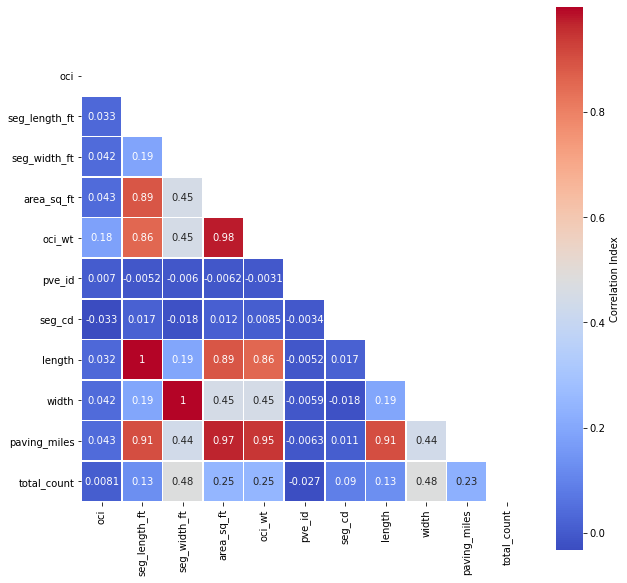

In [30]:
# assign correlation function to new variable
corr = df.corr()
matrix = np.triu(corr) # for triangular matrix
plt.figure(figsize=(10,10))
# parse corr variable intro triangular matrix
sns.heatmap(df.corr(method='pearson'), 
            annot=True, linewidths=.5, 
            cmap="coolwarm", mask=matrix,
            square = True, 
            cbar_kws={'label': 'Correlation Index'})
plt.show()

### Multicollinearity

Let us narrow our focus by removing highly correlated predictors and passing the rest into a new dataframe.

In [31]:
cor_matrix = df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),
                                     k=1).astype(np.bool))

to_drop = [column for column in upper_tri.columns if 
           any(upper_tri[column] > 0.75)]
print('These are the columns we should drop: %s'%to_drop)

These are the columns we should drop: ['area_sq_ft', 'oci_wt', 'length', 'width', 'paving_miles']
